In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load Libraries and dataset and do experimentation on dataset


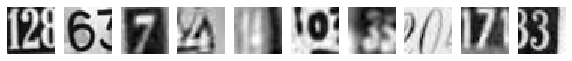

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
# importing the required packages and loading the .h5 type data file using the h5py package  
import h5py
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
tf.set_random_seed(seed)


# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Project 5 - NN/Data/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
# Close this file
h5f.close()

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### 2. Data Pre-processing

In [0]:
# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

# converting y data into categorical (one-hot encoding)
# y_train = np_utils.to_categorical(y_train1)
# y_test = np_utils.to_categorical(y_test1)
y_train = tf.keras.utils.to_categorical(y_train1,num_classes=y_test.shape[1])
y_test = tf.keras.utils.to_categorical(y_test1,num_classes=y_test.shape[1])
print('First 5 examples now are: ', y_train[0:5])

# train and test data points to build a knn model
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

print('Train Set shape for NN :', X_train.shape, y_train.shape)
print('Test Set shape for NN :', X_test.shape, y_test.shape)

First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Train Set shape for NN : (42000, 1024) (42000, 10)
Test Set shape for NN : (18000, 1024) (18000, 10)


# 3. Implement k-Nearest Neighbor (kNN) classifier algorithm to classify the respective digits

In [0]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
KNN_Model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN_Model.fit(x_tr, y_tr)
y_KNNpredicted = KNN_Model.predict(x_te)
print(metrics.classification_report(y_te,y_KNNpredicted))
print('Accuracy using kNN model :', KNN_Model.score(x_te, y_te))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35       221
           1       0.35      0.44      0.39       185
           2       0.28      0.33      0.30       187
           3       0.23      0.22      0.22       185
           4       0.37      0.43      0.40       204
           5       0.30      0.24      0.27       211
           6       0.26      0.28      0.27       202
           7       0.45      0.44      0.45       205
           8       0.25      0.15      0.19       198
           9       0.25      0.25      0.25       202

    accuracy                           0.31      2000
   macro avg       0.31      0.31      0.31      2000
weighted avg       0.31      0.31      0.31      2000

Accuracy using kNN model : 0.3135


### Classification Metrics for kNN Classifier

1.   **Accuracy : 31.35%**
2.   **Precision : 31%**
3.   **Recall : 31%**
4.   **f1-score : 31%**


# 4. Apply GridSearch CV to optimize the value of the hyperparameter 'k' 

In [0]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values of n_neighbors that needs to be tested
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

In [0]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.285

# 5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) 

In [0]:
from keras.layers import Activation
from keras import optimizers
from keras.layers import Flatten

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 1024
model.add(tf.keras.layers.Dense(50, input_shape = (1024, )))

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 50)                51250     
_________________________________________________________________
dense_106 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_107 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_108 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_109 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_110 (Dense)            (None, 10)                510       
Total params: 61,960
Trainable params: 61,960
Non-trainable params: 0
_________________________________________________

In [0]:
model.fit(X_train,y_train,    
          validation_data=(X_test,y_test),      
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 187us/sample - loss: 2.2589 - acc: 0.1423 - val_loss: 2.1440 - val_acc: 0.2048
Epoch 2/10
42000/42000 [==============================] - 7s 163us/sample - loss: 1.8008 - acc: 0.3644 - val_loss: 1.6157 - val_acc: 0.4308
Epoch 3/10
42000/42000 [==============================] - 7s 163us/sample - loss: 1.4601 - acc: 0.5048 - val_loss: 1.3351 - val_acc: 0.5561
Epoch 4/10
42000/42000 [==============================] - 7s 162us/sample - loss: 1.3182 - acc: 0.5619 - val_loss: 1.5125 - val_acc: 0.4939
Epoch 5/10
42000/42000 [==============================] - 7s 164us/sample - loss: 1.2194 - acc: 0.6029 - val_loss: 1.0766 - val_acc: 0.6598
Epoch 6/10
42000/42000 [==============================] - 7s 162us/sample - loss: 1.1363 - acc: 0.6361 - val_loss: 1.1501 - val_acc: 0.6213
Epoch 7/10
42000/42000 [==============================] - 7s 163us/sample - loss: 1.0606 - acc: 0.6629 - val_l

In [0]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 95us/sample - loss: 1.0259 - acc: 0.6698


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.66983336


# 6. Implement batch normalization for training the neural network

In [0]:
# Batch normalization layer is usually inserted after dense/convolution and before nonlinearity
from keras.layers import BatchNormalization, Dropout

def mlp_model():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(50, input_shape = (1024, )))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))  
    #Add 1st hidden layer  
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 2nd hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 3rd hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 4th hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))
    #Add OUTPUT layer 
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr = 0.03)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
model = mlp_model()
history = model.fit(X_train,y_train,    
          validation_data=(X_test,y_test),      
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 16s 380us/sample - loss: 1.7700 - acc: 0.3795 - val_loss: 1.9661 - val_acc: 0.3661
Epoch 2/10
42000/42000 [==============================] - 15s 347us/sample - loss: 1.2630 - acc: 0.5892 - val_loss: 1.2622 - val_acc: 0.5783
Epoch 3/10
42000/42000 [==============================] - 14s 345us/sample - loss: 1.1100 - acc: 0.6466 - val_loss: 1.2686 - val_acc: 0.5846
Epoch 4/10
42000/42000 [==============================] - 14s 344us/sample - loss: 1.0262 - acc: 0.6739 - val_loss: 1.3017 - val_acc: 0.5841
Epoch 5/10
42000/42000 [==============================] - 15s 349us/sample - loss: 0.9698 - acc: 0.6927 - val_loss: 1.1482 - val_acc: 0.6394
Epoch 6/10
42000/42000 [==============================] - 14s 340us/sample - loss: 0.9229 - acc: 0.7084 - val_loss: 1.2837 - val_acc: 0.5734
Epoch 7/10
42000/42000 [==============================] - 14s 343us/sample - loss: 0.8833 - acc: 0.7205 

In [0]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 116us/sample - loss: 0.9484 - acc: 0.7050


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.705


# Tweaking the learning rate 

In [0]:
def mlp_model():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(50, input_shape = (1024, )))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))  
    #Add 1st hidden layer  
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 2nd hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 3rd hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))    
    #Add 4th hidden layer
    model.add(tf.keras.layers.Dense(50))
    model.add(tf.keras.layers.BatchNormalization())                    
    model.add(tf.keras.layers.Activation('relu'))
    #Add OUTPUT layer 
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model



In [0]:
model = mlp_model()
history = model.fit(X_train,y_train,    
          validation_data=(X_test,y_test),      
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 16s 371us/sample - loss: 2.0082 - acc: 0.2871 - val_loss: 2.1712 - val_acc: 0.2437
Epoch 2/10
42000/42000 [==============================] - 14s 333us/sample - loss: 1.4328 - acc: 0.5327 - val_loss: 1.6327 - val_acc: 0.4543
Epoch 3/10
42000/42000 [==============================] - 14s 334us/sample - loss: 1.2274 - acc: 0.6097 - val_loss: 1.3930 - val_acc: 0.5578
Epoch 4/10
42000/42000 [==============================] - 14s 333us/sample - loss: 1.1326 - acc: 0.6363 - val_loss: 1.5558 - val_acc: 0.5226
Epoch 5/10
42000/42000 [==============================] - 14s 341us/sample - loss: 1.0679 - acc: 0.6623 - val_loss: 1.1657 - val_acc: 0.6221
Epoch 6/10
42000/42000 [==============================] - 14s 337us/sample - loss: 1.0187 - acc: 0.6770 - val_loss: 1.0812 - val_acc: 0.6537
Epoch 7/10
42000/42000 [==============================] - 14s 343us/sample - loss: 0.9740 - acc: 0.6917 

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 116us/sample - loss: 1.2031 - acc: 0.6250
Test accuracy:  0.625


In [0]:
def mlp_model():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(50, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))    
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(50, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(50, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    # model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Activation('softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr = 0.03)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [0]:
model = mlp_model()
history = model.fit(X_train,y_train,    
          validation_data=(X_test,y_test),      
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 338us/sample - loss: 1.7137 - acc: 0.4129 - val_loss: 1.7576 - val_acc: 0.4253
Epoch 2/10
42000/42000 [==============================] - 13s 314us/sample - loss: 1.2474 - acc: 0.5984 - val_loss: 1.7493 - val_acc: 0.4387
Epoch 3/10
42000/42000 [==============================] - 13s 303us/sample - loss: 1.0996 - acc: 0.6502 - val_loss: 1.4751 - val_acc: 0.5346
Epoch 4/10
42000/42000 [==============================] - 13s 305us/sample - loss: 1.0216 - acc: 0.6750 - val_loss: 1.3764 - val_acc: 0.5578
Epoch 5/10
42000/42000 [==============================] - 13s 310us/sample - loss: 0.9565 - acc: 0.6973 - val_loss: 1.3234 - val_acc: 0.5760
Epoch 6/10
42000/42000 [==============================] - 13s 308us/sample - loss: 0.9087 - acc: 0.7127 - val_loss: 1.0628 - val_acc: 0.6789
Epoch 7/10
42000/42000 [==============================] - 13s 300us/sample - loss: 0.8759 - acc: 0.7228 

In [0]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 113us/sample - loss: 0.8964 - acc: 0.7161
Test accuracy:  0.7160556


In [0]:
y_NNpredClass = model.predict_classes(X_test)

In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test1, y_NNpredClass)
print(accuracy)

0.7160555555555556


In [0]:
from sklearn.metrics import precision_score

In [0]:
# precision tp / (tp + fp)
precision = precision_score(y_test1, y_NNpredClass, average= 'weighted')
print('Precision: %f' % precision)

Precision: 0.736983


In [0]:
from sklearn.metrics import recall_score

In [0]:
# recall: tp / (tp + fn)
recall = recall_score(y_test1, y_NNpredClass, average='weighted')
print('Recall: %f' % recall)

Recall: 0.716056


In [0]:
from sklearn.metrics import f1_score

In [0]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, y_NNpredClass, average='weighted')
print('F1 score: %f' % f1)

F1 score: 0.717704


### Classification Metrics for Neural Networks

1.   **Accuracy : 71.60%**
2.   **Precision : 73.69%**
3.   **Recall : 71.60%**
4.   **f1-score : 71.77%**

# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics



*   As evident from the Classification Metric scores above, a Neural Network is far more desirable to solve a complex problem such as Image Recognition when compared to traditional Classifiers such as kNN Classifier
*   IN case of a Neural Network classification, very minimal if not nill feature extraction is required in order to get a classification algorithm to run on the data.
*   Since NN does not require any feature extraction steps to be performed, the need for a domain expert to identify all the relevant features that need to be part of the algorithm is considerably reduced.
*   Each perceptron denotes / represents one aspect of a data point and together all the perceptrons help provide an accurate representation of the input image.
*   The weights assigned to each node represents it relationship with respect to the output and these weights gets adjusted as the algorithm starts learning and developing (Backward Propagation)
*   On the flip side NN requires special GPU to run the algorithm, while kNN could run with ni such special requirements
*   Also the story telling power / interpretability of the kNN model is more when compared to NN
